# Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Drive mount

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# HR Analytics Employee Attrition Dataset

1. Predicting Employee Attrition Using Logistic Regression
   
   Dataset: HR Analytics Employee Attrition Dataset
   
   Preprocessing Steps:
     - Handle missing values if any.
     - Encode categorical variables (e.g., one-hot encoding for department, gender, etc.).
     - Standardize numerical features.
   
   
   **Task: Implement logistic regression to predict employee attrition and evaluate the model using precision, recall, and F1-score.**


In [36]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/HREmployeeAttrition.csv')  # Replace 'your_file.csv' with the actual file name

In [37]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [38]:
df.shape

(1470, 35)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [40]:
#basic statistics of the dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Handling missing values

In [41]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**There is no missing values in the dataset so no need of data imputation.**

### Encoding

In [42]:
# categorical features in the dataset, datatype 'object'
categorical_features = df.select_dtypes('object').columns
print("Categorical Features in the data:\n", categorical_features)

Categorical Features in the data:
 Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [43]:
# numerical features
numerical_features = df.drop(categorical_features, axis=1)
print("\nNumerical Features in the data:\n", numerical_features.columns)
print(numerical_features.shape)


Numerical Features in the data:
 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
(1470, 26)


In [44]:
# Label encoding
encoder = LabelEncoder()
encoded_features_df = df.copy()

# Apply LabelEncoder to each categorical feature
for feature in categorical_features:
    encoded_features_df[feature] = encoder.fit_transform(df[feature])

df = encoded_features_df.copy()

In [45]:
for category in df[categorical_features]:
    print(category, ': ', df[category].nunique(), ': ', df[category].unique())
    print(df[category].value_counts(), '\n')

Attrition :  2 :  [1 0]
Attrition
0    1233
1     237
Name: count, dtype: int64 

BusinessTravel :  3 :  [2 1 0]
BusinessTravel
2    1043
1     277
0     150
Name: count, dtype: int64 

Department :  3 :  [2 1 0]
Department
1    961
2    446
0     63
Name: count, dtype: int64 

EducationField :  6 :  [1 4 3 2 5 0]
EducationField
1    606
3    464
2    159
5    132
4     82
0     27
Name: count, dtype: int64 

Gender :  2 :  [0 1]
Gender
1    882
0    588
Name: count, dtype: int64 

JobRole :  9 :  [7 6 2 4 0 3 8 5 1]
JobRole
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: count, dtype: int64 

MaritalStatus :  3 :  [2 1 0]
MaritalStatus
1    673
2    470
0    327
Name: count, dtype: int64 

Over18 :  1 :  [0]
Over18
0    1470
Name: count, dtype: int64 

OverTime :  2 :  [1 0]
OverTime
0    1054
1     416
Name: count, dtype: int64 



### Standarization

In [46]:
# Applying standard scalar
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Creating dataframe for numerical features
numerical_features_scaled_df = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)
df.drop(df[numerical_features.columns], axis=1, inplace=True)
df = pd.concat([df, numerical_features_scaled_df], axis=1)
df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,2,1,0,7,2,0,1,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,0,1,1,1,1,6,1,0,0,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,1,2,1,4,1,2,2,0,1,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,0,1,1,1,0,6,1,0,1,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,0,2,1,3,1,2,1,0,0,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


### Model Training

In [47]:
# Separating the features and target variable
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
# Applying the model
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [49]:
# Predicting the target variable
Y_pred = lr_model.predict(X_test)

# Model Evaluation

In [50]:
print('Classification Report:\n', classification_report(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.74      0.36      0.48        39

    accuracy                           0.90       294
   macro avg       0.82      0.67      0.71       294
weighted avg       0.89      0.90      0.88       294



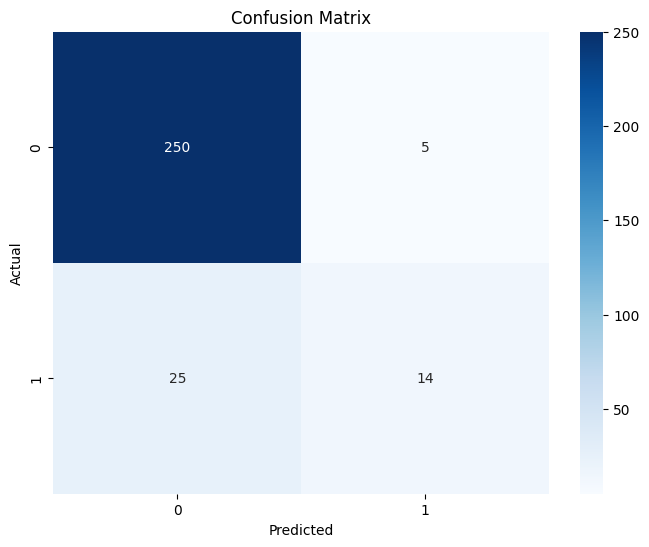

In [51]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#  Credit Card Fraud Detection Dataset

2. Classifying Credit Card Fraud Using Decision Trees
   
   Dataset: Credit Card Fraud Detection Dataset
   
   Preprocessing Steps:
     - Handle missing values if any.
     - Standardize features.
   
  **Task: Implement a decision tree classifier to classify credit card transactions as fraud or not and evaluate the model using ROC-AUC and confusion matrix.**

In [ ]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/creditcard.csv')  # Replace 'your_file.csv' with the actual file name

# Heart Disease Dataset

3. Predicting Heart Disease Using Logistic Regression
   
   Dataset: Heart Disease Dataset
   
   Preprocessing Steps:
     - Handle missing values (e.g., fill missing values with mean).
     - Encode categorical variables (e.g., one-hot encoding for gender, chest pain type, etc.).
     - Standardize numerical features.
   
   
   **Task: Implement logistic regression to predict heart disease and evaluate the model using accuracy and ROC-AUC.**


In [ ]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/heart_disease_data.csv')  # Replace 'your_file.csv' with the actual file name

# Spam Email Dataset

4. Classifying Emails as Spam Using Decision Trees
    
    Dataset: Spam Email Dataset
    
    Preprocessing Steps:
      - Handle missing values if any.
      - Standardize features.
      - Encode categorical variables if present.
    
    
    Task: Implement a decision tree classifier to classify emails as spam or not and evaluate the model using precision, recall, and F1-score.

In [5]:
# Read the CSV file
 # This dataset file contain some characters that cannot be encoded so that's why i use encoding = cp1252
 # you can also use encoding='ISO-8859-1'
data = pd.read_csv('/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/spam.csv', encoding='cp1252')  # Replace 'your_file.csv' with the actual file name

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

**There are a lot of missing values in unnamed 2, 3 & 4**

**so the best practice is to removes these values.**

In [8]:
# this is the code for removing the columns in the dataset
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [9]:
data.shape

(5572, 2)

In [10]:
# renaming the cols
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.sample(5)

,target,text
3758,ham,"GOD ASKED, \What is forgiveness?\"" A little ch..."
5402,ham,Hi babe its me thanks for coming even though i...
2987,ham,Do you still have the grinder?
3333,ham,"That's fine, have him give me a call if he kno..."
968,ham,Are you willing to go for aptitude class.


### Label Encoding

In [11]:
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [12]:
data.duplicated().sum()

403

In [13]:
data = data.drop_duplicates(keep='first')

### Text vectorization using TF-IDF

**We have a column with the text values but machine only understand numeric value so that why i am doing vectorization to convert text into a numeric values.**

In [14]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['target']

### Train test aplit

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Train a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# Make predictions
y_pred = clf.predict(X_test)

### Model Evaluation

In [18]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1309   22]
 [  41  179]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1331
           1       0.89      0.81      0.85       220

    accuracy                           0.96      1551
   macro avg       0.93      0.90      0.91      1551
weighted avg       0.96      0.96      0.96      1551



# Customer Satisfaction Dataset

5. Predicting Customer Satisfaction Using Logistic Regression
    
    Dataset: Customer Satisfaction Dataset
    
    Preprocessing Steps:
      - Handle missing values (e.g., fill missing values with median).
      - Encode categorical variables (e.g., one-hot encoding for region).
      - Standardize numerical features.

    **Task: Implement logistic regression to predict customer satisfaction and evaluate the model using accuracy and confusion matrix.**


In [13]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/Customer-survey-data.csv')  # Replace 'your_file.csv' with the actual file name

In [14]:
df.head()

,Customer ID,Overall Delivery Experience (Rating),Food Quality (Rating),Speed of Delivery (Rating),Order Accuracy
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes


In [15]:
df.describe()

,Customer ID,Overall Delivery Experience (Rating),Food Quality (Rating),Speed of Delivery (Rating)
count,10616.000000,10198.000000,10364.000000,10377.000000
mean,5308.500000,3.325260,3.332015,3.322926
std,3064.719563,1.419754,1.414709,1.408918
min,1.000000,1.000000,1.000000,1.000000
25%,2654.750000,2.000000,2.000000,2.000000
50%,5308.500000,3.000000,3.000000,3.000000
75%,7962.250000,5.000000,5.000000,5.000000
max,10616.000000,5.000000,5.000000,5.000000


In [16]:
df.tail()

,Customer ID,Overall Delivery Experience (Rating),Food Quality (Rating),Speed of Delivery (Rating),Order Accuracy
10611,10612,4.0,2.0,3.0,Yes
10612,10613,3.0,3.0,3.0,Yes
10613,10614,5.0,3.0,3.0,Yes
10614,10615,3.0,3.0,3.0,Yes
10615,10616,1.0,3.0,3.0,Yes


In [17]:
df['Order Accuracy'].value_counts()

Order Accuracy
Yes    7111
No     2845
Name: count, dtype: int64

In [18]:
# Dropping  unnecessary columns
df = df.drop(columns=['Customer ID'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10616 entries, 0 to 10615
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Overall Delivery Experience (Rating)  10198 non-null  float64
 1   Food Quality (Rating)                 10364 non-null  float64
 2   Speed of Delivery (Rating)            10377 non-null  float64
 3   Order Accuracy                        9956 non-null   object 
dtypes: float64(3), object(1)
memory usage: 331.9+ KB


In [20]:
df.isnull().sum()

Overall Delivery Experience (Rating)    418
Food Quality (Rating)                   252
Speed of Delivery (Rating)              239
Order Accuracy                          660
dtype: int64

**There is null values in the dataset**

### Handling Missing Values

In [23]:
# Handle missing values for numerical features by filling with median
numerical_features = ['Food Quality (Rating)', 'Speed of Delivery (Rating)']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

### Feature Encoding

In [24]:
# using One-hot encode for categorical feature 'Order Accuracy'
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(drop='first'))
])

In [26]:
target_column = 'Overall Delivery Experience (Rating)'  # Exact name
categorical_feature = 'Order Accuracy'

In [27]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, [categorical_feature])
    ])

In [28]:
# Separate features and target
X = df.drop(columns=[target_column])  # Features
y = df[target_column].apply(lambda x: 1 if x >= 4 else 0)  # Binary target

In [29]:
X_preprocessed = preprocessor.fit_transform(X)

### Train Test Split

In [30]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

### Model Training

In [31]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [32]:
# Make predictions
y_pred = model.predict(X_test)

### Model Evaluation

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 71.84557438794727


In [34]:
print(f"Confusion Matrix:\n{conf_matrix}")


Confusion Matrix:
[[923 280]
 [318 603]]


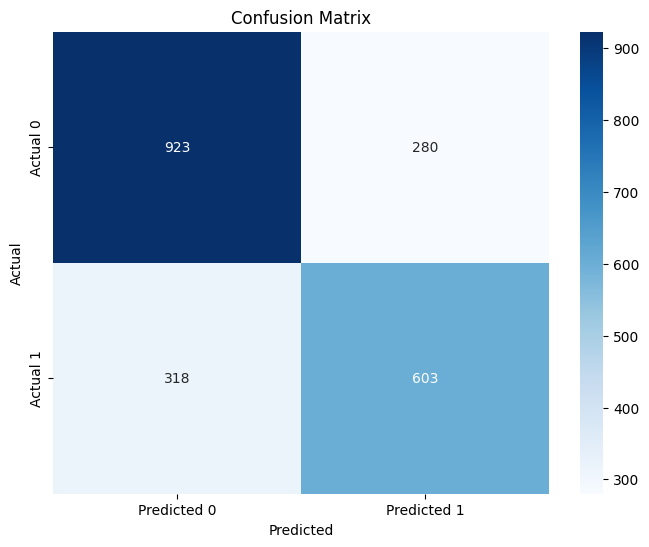

In [35]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [36]:
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1203
           1       0.68      0.65      0.67       921

    accuracy                           0.72      2124
   macro avg       0.71      0.71      0.71      2124
weighted avg       0.72      0.72      0.72      2124

